In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  # 데이터 셋 나누는 모듈
from sklearn.neighbors import KNeighborsRegressor     # K-NN 회귀 사용
from sklearn.metrics import mean_absolute_error       # 평균 절댓값 오차 계산
from sklearn.linear_model import LinearRegression, Ridge, Lasso     # 선형 회귀, 규제 사용
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # 변환기 사용


In [ ]:
 perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
 
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)    # 훈련세트, 테스트세트 분류

train_input = train_input.reshape(-1,1)   # 2차원 배열로 변경
test_input = test_input.reshape(-1,1)

knr = KNeighborsRegressor()     # 모델 학습
knr.fit(train_input,train_target)

knr.score(test_input,test_target)    # 모델 평가

test_pre = knr.predict(test_input)    # 테스트 세트에 예측 만들기
mae = mean_absolute_error(test_target,test_pre)   # 테스트 세트에 대한 평균 절댓값 오차를 계산하다.

print('test 데이터 평가:',knr.score(test_input,test_target))
print('train 데이터 평가: ',knr.score(train_input,train_target))    # 테스트 데이터 > 학습 데이터 -> 과소적합
print()

# 이웃의 개수를 3개로 줄여 더욱 민감하게 학습시킨다.
knr.n_neighbors = 3
knr.fit(train_input,train_target)

print('test 데이터 평가:',knr.score(test_input,test_target))
print('train 데이터 평가: ',knr.score(train_input,train_target))



test 데이터 평가: 0.992809406101064
train 데이터 평가:  0.9698823289099254

test 데이터 평가: 0.9746459963987609
train 데이터 평가:  0.9804899950518966


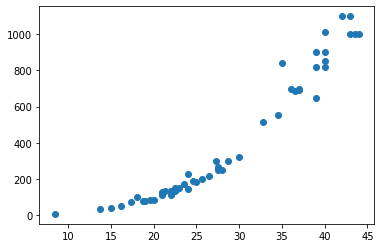

In [ ]:
plt.scatter(perch_length,perch_weight)
plt.show()

In [ ]:
 perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
 
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)
train_input, test_input = train_input.reshape(-1,1), test_input.reshape(-1,1)

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

print('K-NN(회귀)50cm 도미 무게(g): ',knr.predict([[50]]))
print('K-NN(회귀) 훈련 점수: ',knr.score(train_input,train_target))
print('K-NN(회귀) 테스트 점수: ',knr.score(test_input,test_target))
print()
# 문제점: 50cm 농어의 무게는 1,033g보다 훨씬 더 나간다
# 분석: K-NN은 사례 기반 학습이기 떄문에 모델 파라미터가 없다.
# 해결: 선형 회귀를 사용한다.

# 선형 회귀 객체 만든 후, 학습시켜 값 예측
lr1 = LinearRegression()  
lr1.fit(train_input,train_target)

print('선형 회귀(1차 함수) 50cm 도미 무게(g): ',lr1.predict([[50]])) 
print('선형 회귀(1차 함수) 훈련 점수: ',lr1.score(train_input,train_target))
print('선형 회귀(1차 함수) 테스트 점수: ',lr1.score(test_input,test_target))
print()

# 직선 그래프가 아닌 곡선 그래프로 그리기 위해 제곱해준다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
lr2 = LinearRegression()
lr2.fit(train_poly,train_target)

print('다항 회귀(2차 함수) 50cm 도미 무게(g): ',lr2.predict([[50 ** 2, 50]]))
print('다항 회귀(2차 함수) 훈련 점수: ',lr2.score(train_poly,train_target))
print('다항 회귀(2차 함수) 테스트 점수: ',lr2.score(test_poly,test_target))  # 약간의 과소적합이 남아있다.
print()

K-NN(회귀)50cm 도미 무게(g):  [1033.33333333]
K-NN(회귀) 훈련 점수:  0.9804899950518966
K-NN(회귀) 테스트 점수:  0.9746459963987609

선형 회귀(1차 함수) 50cm 도미 무게(g):  [1241.83860323]
선형 회귀(1차 함수) 훈련 점수:  0.939846333997604
선형 회귀(1차 함수) 테스트 점수:  0.8247503123313558

비선형 회귀(2차 함수) 50cm 도미 무게(g):  [1573.98423528]
비선형 회귀(2차 함수) 훈련 점수:  0.9706807451768623
비선형 회귀(2차 함수) 테스트 점수:  0.9775935108325122



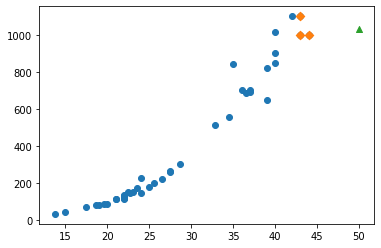

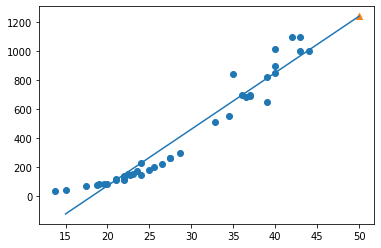

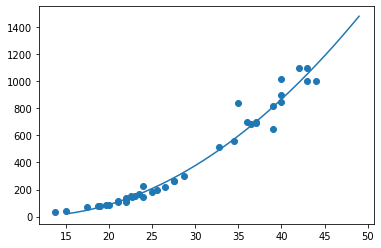

In [ ]:
d, idx = knr.kneighbors([[50]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[idx],train_target[idx],marker='D')
plt.scatter(50,1033,marker='^')     # K-NN(회귀)-50cm 농어 데이터
plt.show()

plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr1.coef_+lr1.intercept_,50*lr1.coef_+lr1.intercept_])
plt.scatter(50,1241.8,marker='^')    # 선형 화귀-50cm 농어 데이터
plt.show()

point = np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point,1.01*point**2-21.6*point+116.05) # 다항 회귀-50cm 농어 데이터
plt.show()

In [7]:
df = pd.read_csv('https://bit.ly/perch_csv_data')

perch_full = df.to_numpy()    # 농어의 길이, 높이, 넓이

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)


poly = PolynomialFeatures(degree=5, include_bias=False)      # 객체 생성, degree: 5제곱까지 특성 생성, include_bias: 1삭제
poly.fit(train_input)           # 특성 공학
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()     # 다중 회귀 만들기
lr.fit(train_poly,train_target)
lr.score(test_poly,test_target)

ss = StandardScaler()      # 전처리 만들기
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

ridge = Ridge(alpha=0.1)       # 릿지 회귀(규제) 만들기
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570365
0.9827976465386884


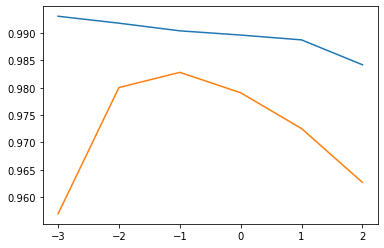

In [3]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]    # 적절한 규제 강도 찾기
train_score, test_score = [], []

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()

0.9888067471131867
0.9824470598706695


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

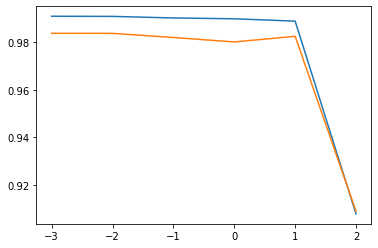

In [14]:
lasso = Lasso(alpha=10)     # 라쏘 회귀 사용

lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]     # 적절한 규제 강도 찾기
train_score, test_score = [], []

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()
